In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv('datasets/data_olx.csv',parse_dates=['display_date'])

df.columns=df.columns.str.replace(' ','_').str.lower()

df.head()


,location_resolved,display_date,title,harga,merek,model,varian,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual,nama_bursa_mobil
0,Ngaglik,2022-12-21 07:11:44+00:00,[DP8JT] VIOS G 1.5 MANUAL 2017 ISTIMEWA,138000000.0,Toyota,Vios,1.5 G Bensin-MT,2017,85.000-90.000,Bensin,Hitam,Manual,Sedan,>1.000 - 1.500 cc,Diler,NaN
1,Piyungan,2022-12-20 11:05:44+00:00,Yaris E Upgrade TRD Sportivo 1.5 M/T Th’2008,97900000.0,Toyota,Yaris,toyota-yaris-67591-e,2008,145.000-150.000,Bensin,Silver,Manual,NaN,>1.000 - 1.500 cc,Diler,NaN
2,Wates,2022-12-22 07:40:38+00:00,[PAJAK PANJANG] Yaris TRD Sportivo m/t 2012 Si...,121000000.0,Toyota,Yaris,toyota-yaris-67596-trd-sportivo,2012,85.000-90.000,Bensin,Silver,Manual,Compact & City Car,>1.000 - 1.500 cc,Individu,NaN
3,Wonosari,2022-12-22 07:40:07+00:00,Toyota Camry 2.5 V Bensin a/t 2014 Hitam,221000000.0,Toyota,Camry,2.5 V Bensin-AT,2014,55.000-60.000,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Individu,NaN
4,Pleret,2022-12-22 09:45:17+00:00,Avanza G thn 2015 asli ab manual,133000000.0,Toyota,Avanza,1.3 G Bensin-MT,2015,90.000-95.000,Bensin,Silver,Manual,Minibus,>1.000 - 1.500 cc,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   location_resolved  4975 non-null   object             
 1   display_date       4975 non-null   datetime64[ns, UTC]
 2   title              4975 non-null   object             
 3   harga              4975 non-null   float64            
 4   merek              4975 non-null   object             
 5   model              4975 non-null   object             
 6   varian             4944 non-null   object             
 7   tahun              4975 non-null   object             
 8   jarak_tempuh       4975 non-null   object             
 9   tipe_bahan_bakar   4975 non-null   object             
 10  warna              4975 non-null   object             
 11  transmisi          4975 non-null   object             
 12  tipe_bodi          3862 non-null   object       

In [4]:
colcat=df.select_dtypes('O').columns.to_list()
colcat

['location_resolved',
 'title',
 'merek',
 'model',
 'varian',
 'tahun',
 'jarak_tempuh',
 'tipe_bahan_bakar',
 'warna',
 'transmisi',
 'tipe_bodi',
 'kapasitas_mesin',
 'tipe_penjual',
 'nama_bursa_mobil']

In [65]:
size=(11,6)
def num_dist(data,var):
  fig,ax=plt.subplots(1,2,figsize=size)

  sns.histplot(x=var,data=data,kde=True,ax=ax[0])
  ax[0].set_title(f'{var} Distribution Histogram')

  sns.boxplot(x=var,data=data,ax=ax[1])
  ax[1].set_title(f'{var} Distribution Boxplot')

def cat_dist(data,var,value:bool|int=False):
  if value:
    fig,ax = plt.subplots(2,1,figsize=size)
    df=data[var].dropna().value_counts()
    df=df.head(value) if value else df
    sns.barplot(x=df.values,y=df.index,ax=ax[0])
    ax[0].set_title(f'Top {value if value else ""} {var}')
    
    df=data[var].dropna().value_counts()
    df=df.sort_values().head(value) if value else df.sort_values()
    sns.barplot(x=df.values,y=df.index,ax=ax[1])
    ax[1].set_title(f'Bottom {value } {var}')
  
  else:
    fig,ax = plt.subplots(1,1,figsize=size)
    df=data[var].dropna().value_counts()
    # df=df.head(value) if value else df
    # print(df)
    sns.barplot(x=df.values,y=df.index,ax=ax)
    ax.set_title(f'Top {value if value else ""} {var}')


In [6]:
df.nunique()

location_resolved     182
display_date         4903
title                4183
harga                 660
merek                  13
model                 243
varian               1073
tahun                  38
jarak_tempuh           59
tipe_bahan_bakar        4
warna                  14
transmisi               3
tipe_bodi              18
kapasitas_mesin         5
tipe_penjual            2
nama_bursa_mobil        9
dtype: int64

In [7]:
# for col in colcat:
#     if df[col].nunique()>10: cat_dist(df,col,value=10)
#     else :cat_dist(df,col)
#     plt.subplots_adjust(hspace=.5)

In [8]:
# coldrop=['location_resolved','model','varian','tahun','kapasitas_mesin']
coldrop=df.drop('title',axis=1).select_dtypes('O').columns.to_list()
for _ in range(len(coldrop)):
    for col in coldrop:
        unique_var=(df[col].value_counts()<10).to_frame()
        uni=unique_var[unique_var[col]==True].index.to_list()
        index_uni=df[df[col].isin(uni)].index
        df.drop(index_uni,inplace=True,axis=0)

In [9]:
df.shape

(1358, 16)

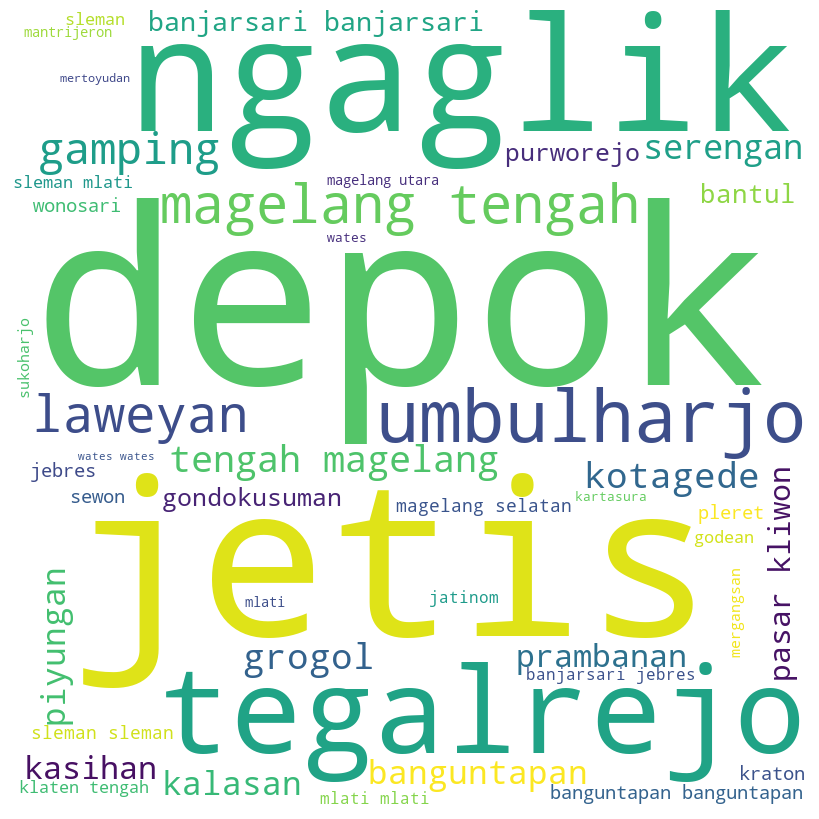

In [10]:
from wordcloud import WordCloud

bow=''
for val in df.location_resolved.str.strip():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    bow += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(bow)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
# bow

In [11]:
top_10_loc=df.location_resolved.value_counts()[:10]


In [12]:
lowest_loc=(df.location_resolved.value_counts()<20).to_frame()
lowest_loc[lowest_loc.location_resolved == True].index[:100]

Index(['Sewon', 'Wonosari', 'Magelang Selatan', 'Godean', 'Klaten Tengah',
       'Jatinom', 'Sukoharjo', 'Mergangsan', 'Mantrijeron', 'Magelang Utara',
       'Kartasura', 'Mertoyudan'],
      dtype='object')

In [13]:
df.jarak_tempuh.unique()

array(['85.000-90.000', '55.000-60.000', '90.000-95.000', '0-5.000',
       '65.000-70.000', '20.000-25.000', '125.000-130.000',
       '30.000-35.000', '80.000-85.000', '10.000-15.000', '40.000-45.000',
       '25.000-30.000', '15.000-20.000', '110.000-115.000',
       '60.000-65.000', '5.000-10.000', '70.000-75.000',
       '100.000-105.000', '115.000-120.000', '95.000-100.000',
       '135.000-140.000', '50.000-55.000', '75.000-80.000',
       '45.000-50.000', '105.000-110.000', '35.000-40.000',
       '130.000-135.000', '155.000-160.000'], dtype=object)

In [14]:
df.harga.isnull().sum()

0

In [15]:
df.tahun.unique()

array(['2017', '2014', '2015', '2013', '2022', '2019', '2012', '2011',
       '2016', '2018', '2021', '2020', '2010', '2008', '2005'],
      dtype=object)

In [16]:
df.drop('title',axis=1,inplace=True)

In [17]:
null_pct=(df.isnull().sum()/df.shape[0]*100).round(2).to_frame('Null Percentage %').style.background_gradient('summer_r')
null_pct

,Null Percentage %
location_resolved,0.000000
display_date,0.000000
harga,0.000000
merek,0.000000
model,0.000000
varian,1.100000
tahun,0.000000
jarak_tempuh,0.000000
tipe_bahan_bakar,0.000000
warna,0.000000


In [18]:
df.nunique()

location_resolved      39
display_date         1349
harga                 290
merek                   8
model                  31
varian                 65
tahun                  15
jarak_tempuh           28
tipe_bahan_bakar        2
warna                   8
transmisi               2
tipe_bodi               7
kapasitas_mesin         4
tipe_penjual            2
nama_bursa_mobil        1
dtype: int64

In [19]:
df.drop(['varian','nama_bursa_mobil'],axis=1,inplace=True)

In [20]:
df.nunique()

location_resolved      39
display_date         1349
harga                 290
merek                   8
model                  31
tahun                  15
jarak_tempuh           28
tipe_bahan_bakar        2
warna                   8
transmisi               2
tipe_bodi               7
kapasitas_mesin         4
tipe_penjual            2
dtype: int64

In [21]:
colcat=df.select_dtypes('O').columns.to_list()
colcat

['location_resolved',
 'merek',
 'model',
 'tahun',
 'jarak_tempuh',
 'tipe_bahan_bakar',
 'warna',
 'transmisi',
 'tipe_bodi',
 'kapasitas_mesin',
 'tipe_penjual']

In [22]:
for col in colcat:
    df[col]=df[col].fillna('undefined')

In [23]:
df.head(10)

,location_resolved,display_date,harga,merek,model,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual
0,Ngaglik,2022-12-21 07:11:44+00:00,138000000.0,Toyota,Vios,2017,85.000-90.000,Bensin,Hitam,Manual,Sedan,>1.000 - 1.500 cc,Diler
3,Wonosari,2022-12-22 07:40:07+00:00,221000000.0,Toyota,Camry,2014,55.000-60.000,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Individu
4,Pleret,2022-12-22 09:45:17+00:00,133000000.0,Toyota,Avanza,2015,90.000-95.000,Bensin,Silver,Manual,Minibus,>1.000 - 1.500 cc,undefined
5,Depok,2022-12-22 09:25:14+00:00,140000000.0,Toyota,Rush,2013,85.000-90.000,Bensin,Abu-abu,Automatic,Jeep,>1.000 - 1.500 cc,Individu
9,Mlati,2022-12-22 07:52:34+00:00,435000000.0,Toyota,Kijang Innova,2022,0-5.000,Diesel,Hitam,Automatic,Minibus,>2.000 - 3.000 cc,undefined
10,Sleman,2022-12-22 07:47:20+00:00,122000000.0,Toyota,Calya,2017,65.000-70.000,Bensin,Abu-abu,Automatic,undefined,undefined,Diler
11,Sleman,2022-12-22 07:44:21+00:00,210000000.0,Toyota,Yaris,2019,20.000-25.000,Bensin,Hitam,Manual,undefined,>1.000 - 1.500 cc,Diler
14,Jetis,2022-12-22 07:41:02+00:00,294000000.0,Toyota,Kijang Innova,2017,125.000-130.000,Diesel,Hitam,Automatic,MPV,>2.000 - 3.000 cc,Individu
15,Bantul,2022-12-22 07:41:01+00:00,294000000.0,Toyota,Kijang Innova,2017,125.000-130.000,Diesel,Hitam,Automatic,MPV,>2.000 - 3.000 cc,Individu
23,Kotagede,2022-12-22 05:43:41+00:00,125000000.0,Toyota,Yaris,2012,90.000-95.000,Bensin,Hitam,Automatic,Hatchback,>1.000 - 1.500 cc,Individu


In [24]:
time=df.display_date.dt.month
time.value_counts()

12    1197
11     141
10       7
8        5
9        5
7        1
6        1
3        1
Name: display_date, dtype: int64

In [25]:
df.loc[df.display_date.dt.date < pd.to_datetime('06/01/2022')]

C:\Users\aditya\AppData\Local\Temp\ipykernel_17044\1899795599.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df.loc[df.display_date.dt.date < pd.to_datetime('06/01/2022')]


,location_resolved,display_date,harga,merek,model,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual
2078,Gamping,2022-03-07 08:17:01+00:00,135000000.0,Honda,Brio Satya,2018,55.000-60.000,Bensin,Putih,Manual,Compact & City Car,>1.000 - 1.500 cc,Individu


In [26]:
df['jarak_tempuh_clean']=df.jarak_tempuh.str.replace('>300.000','300000-300001',regex=False)
df.jarak_tempuh_clean=df.jarak_tempuh_clean.str.replace('.','',regex=False)
df[['jarak_tempuh_fr','jarak_tempuh_to']]=df.jarak_tempuh_clean.str.split('-',expand=True)
df[['jarak_tempuh_fr','jarak_tempuh_to']]=df[['jarak_tempuh_fr','jarak_tempuh_to']].astype('float')

In [27]:
df.tahun.unique()

array(['2017', '2014', '2015', '2013', '2022', '2019', '2012', '2011',
       '2016', '2018', '2021', '2020', '2010', '2008', '2005'],
      dtype=object)

In [28]:
df[df.tahun.str.contains('1986')].tahun.unique()

array([], dtype=object)

In [29]:
# df.tahun=df.tahun.replace('<1986','1985')
# df.tahun=df.tahun.astype('float')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 4612
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   location_resolved   1358 non-null   object             
 1   display_date        1358 non-null   datetime64[ns, UTC]
 2   harga               1358 non-null   float64            
 3   merek               1358 non-null   object             
 4   model               1358 non-null   object             
 5   tahun               1358 non-null   object             
 6   jarak_tempuh        1358 non-null   object             
 7   tipe_bahan_bakar    1358 non-null   object             
 8   warna               1358 non-null   object             
 9   transmisi           1358 non-null   object             
 10  tipe_bodi           1358 non-null   object             
 11  kapasitas_mesin     1358 non-null   object             
 12  tipe_penjual        1358 non-null 

In [31]:
df.isnull().sum()

location_resolved     0
display_date          0
harga                 0
merek                 0
model                 0
tahun                 0
jarak_tempuh          0
tipe_bahan_bakar      0
warna                 0
transmisi             0
tipe_bodi             0
kapasitas_mesin       0
tipe_penjual          0
jarak_tempuh_clean    0
jarak_tempuh_fr       0
jarak_tempuh_to       0
dtype: int64

In [32]:
df.head()

,location_resolved,display_date,harga,merek,model,tahun,jarak_tempuh,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual,jarak_tempuh_clean,jarak_tempuh_fr,jarak_tempuh_to
0,Ngaglik,2022-12-21 07:11:44+00:00,138000000.0,Toyota,Vios,2017,85.000-90.000,Bensin,Hitam,Manual,Sedan,>1.000 - 1.500 cc,Diler,85000-90000,85000.0,90000.0
3,Wonosari,2022-12-22 07:40:07+00:00,221000000.0,Toyota,Camry,2014,55.000-60.000,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Individu,55000-60000,55000.0,60000.0
4,Pleret,2022-12-22 09:45:17+00:00,133000000.0,Toyota,Avanza,2015,90.000-95.000,Bensin,Silver,Manual,Minibus,>1.000 - 1.500 cc,undefined,90000-95000,90000.0,95000.0
5,Depok,2022-12-22 09:25:14+00:00,140000000.0,Toyota,Rush,2013,85.000-90.000,Bensin,Abu-abu,Automatic,Jeep,>1.000 - 1.500 cc,Individu,85000-90000,85000.0,90000.0
9,Mlati,2022-12-22 07:52:34+00:00,435000000.0,Toyota,Kijang Innova,2022,0-5.000,Diesel,Hitam,Automatic,Minibus,>2.000 - 3.000 cc,undefined,0-5000,0.0,5000.0


In [33]:
df.model.sort_values().unique()

array(['2', 'Accord', 'Alphard', 'Avanza', 'Ayla', 'BR-V', 'Brio',
       'Brio Satya', 'CR-V', 'CX-5', 'Calya', 'Camry', 'City', 'Ertiga',
       'Fortuner', 'Freed', 'Go+ Panca', 'Grand livina', 'HR-V', 'Jazz',
       'Kijang Innova', 'Livina', 'Mobilio', 'Rush', 'Serena', 'Sigra',
       'Spin', 'Terios', 'Vios', 'Xenia', 'Yaris'], dtype=object)

In [34]:
df.nunique()

location_resolved       39
display_date          1349
harga                  290
merek                    8
model                   31
tahun                   15
jarak_tempuh            28
tipe_bahan_bakar         2
warna                    8
transmisi                2
tipe_bodi                8
kapasitas_mesin          5
tipe_penjual             3
jarak_tempuh_clean      28
jarak_tempuh_fr         28
jarak_tempuh_to         28
dtype: int64

In [35]:
df.kapasitas_mesin.value_counts()

>1.000 - 1.500 cc    872
undefined            175
>2.000 - 3.000 cc    151
>1.500 - 2.000 cc    146
<1.000 cc             14
Name: kapasitas_mesin, dtype: int64

In [36]:
colcat=df.select_dtypes('O').columns.to_list()
cat_unused=['jarak_tempuh','jarak_tempuh_clean']
for col in cat_unused:colcat.remove(col)
colcat

['location_resolved',
 'merek',
 'model',
 'tahun',
 'tipe_bahan_bakar',
 'warna',
 'transmisi',
 'tipe_bodi',
 'kapasitas_mesin',
 'tipe_penjual']

In [37]:
df[colcat].head()

,location_resolved,merek,model,tahun,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual
0,Ngaglik,Toyota,Vios,2017,Bensin,Hitam,Manual,Sedan,>1.000 - 1.500 cc,Diler
3,Wonosari,Toyota,Camry,2014,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Individu
4,Pleret,Toyota,Avanza,2015,Bensin,Silver,Manual,Minibus,>1.000 - 1.500 cc,undefined
5,Depok,Toyota,Rush,2013,Bensin,Abu-abu,Automatic,Jeep,>1.000 - 1.500 cc,Individu
9,Mlati,Toyota,Kijang Innova,2022,Diesel,Hitam,Automatic,Minibus,>2.000 - 3.000 cc,undefined


In [38]:
target='harga'
colnum=df.drop(target,axis=1).select_dtypes(['float','int']).columns.to_list()
colnum


['jarak_tempuh_fr', 'jarak_tempuh_to']

In [73]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [40]:
le=LabelEncoder()
ohe=OneHotEncoder()
scaler=MinMaxScaler()
rf=RandomForestRegressor(random_state=1)

In [41]:
X=df[colcat+colnum]
y=df[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(950, 12)
(950,)
(408, 12)
(408,)


In [42]:
X_test

,location_resolved,merek,model,tahun,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual,jarak_tempuh_fr,jarak_tempuh_to
1316,Grogol,Toyota,Camry,2017,Bensin,Hitam,Automatic,Sedan,>2.000 - 3.000 cc,Diler,25000.0,30000.0
3339,Piyungan,Suzuki,Ertiga,2018,Bensin,Silver,Manual,MPV,>1.000 - 1.500 cc,Diler,10000.0,15000.0
1441,Kalasan,Honda,Mobilio,2016,Bensin,Silver,Manual,MPV,>1.000 - 1.500 cc,Diler,45000.0,50000.0
510,Sleman,Toyota,Kijang Innova,2017,Bensin,Putih,Automatic,MPV,>2.000 - 3.000 cc,Individu,80000.0,85000.0
698,Ngaglik,Toyota,Yaris,2011,Bensin,Silver,Automatic,undefined,undefined,Individu,115000.0,120000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2151,Banguntapan,Honda,Brio,2020,Bensin,Merah,Manual,Hatchback,>1.000 - 1.500 cc,Diler,15000.0,20000.0
2480,Pasar Kliwon,Honda,Jazz,2014,Bensin,Oranye,Automatic,Hatchback,>1.000 - 1.500 cc,undefined,100000.0,105000.0
4082,Laweyan,Nissan,Serena,2005,Bensin,Silver,Automatic,Minibus,>1.500 - 2.000 cc,Individu,105000.0,110000.0
1847,Mlati,Honda,Mobilio,2017,Bensin,Abu-abu,Manual,MPV,>1.000 - 1.500 cc,Individu,60000.0,65000.0


In [43]:
for col in colcat:
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.fit_transform(X_test[col])
    

In [44]:
X_train.head()

,location_resolved,merek,model,tahun,tipe_bahan_bakar,warna,transmisi,tipe_bodi,kapasitas_mesin,tipe_penjual,jarak_tempuh_fr,jarak_tempuh_to
853,32,7,30,6,0,4,1,1,1,2,70000.0,75000.0
2663,0,1,27,13,0,7,1,3,2,2,5000.0,10000.0
1715,10,3,6,11,0,5,0,7,4,2,20000.0,25000.0
1266,17,7,23,11,0,5,0,7,1,1,55000.0,60000.0
3075,17,1,25,11,0,6,0,3,1,2,50000.0,55000.0


In [45]:
ct= make_column_transformer(
    # (le,colcat),
    (scaler,colnum+colcat),
    remainder='passthrough'
)

pipe=make_pipeline(ct,rf)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['jarak_tempuh_fr',
                                                   'jarak_tempuh_to',
                                                   'location_resolved', 'merek',
                                                   'model', 'tahun',
                                                   'tipe_bahan_bakar', 'warna',
                                                   'transmisi', 'tipe_bodi',
                                                   'kapasitas_mesin',
                                                   'tipe_penjual'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

In [74]:
y_pred=pipe.predict(X_test)

print(1-mean_absolute_percentage_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9090375878827559
17944741.616460375


In [72]:
feat_important=pd.DataFrame([X_train.columns,rf.feature_importances_]).T.sort_values(1,ascending=False)
feat_important.columns=['variable','information_gain']
feat_important

,variable,information_gain
6,transmisi,0.293505
4,tipe_bahan_bakar,0.194045
9,tipe_penjual,0.144609
5,warna,0.119354
3,tahun,0.056657
10,jarak_tempuh_fr,0.039052
2,model,0.038974
1,merek,0.033079
0,location_resolved,0.030971
8,kapasitas_mesin,0.023966


In [100]:
results=pd.DataFrame([y_pred.astype('int'),y_test]).T
results.columns=columns=['prediction','actual']
results['diff in million']=((results.prediction-results.actual)/1000000).round(2)
results.head(50)

,prediction,actual,diff in million
0,229726666.0,339000000.0,-109.27
1,175120000.0,158000000.0,17.12
2,149410000.0,131000000.0,18.41
3,314589999.0,304000000.0,10.59
4,114105000.0,116000000.0,-1.90
5,372750000.0,408000000.0,-35.25
6,173660000.0,166000000.0,7.66
7,141234999.0,137000000.0,4.23
8,236090000.0,195000000.0,41.09
9,232035000.0,229000000.0,3.04


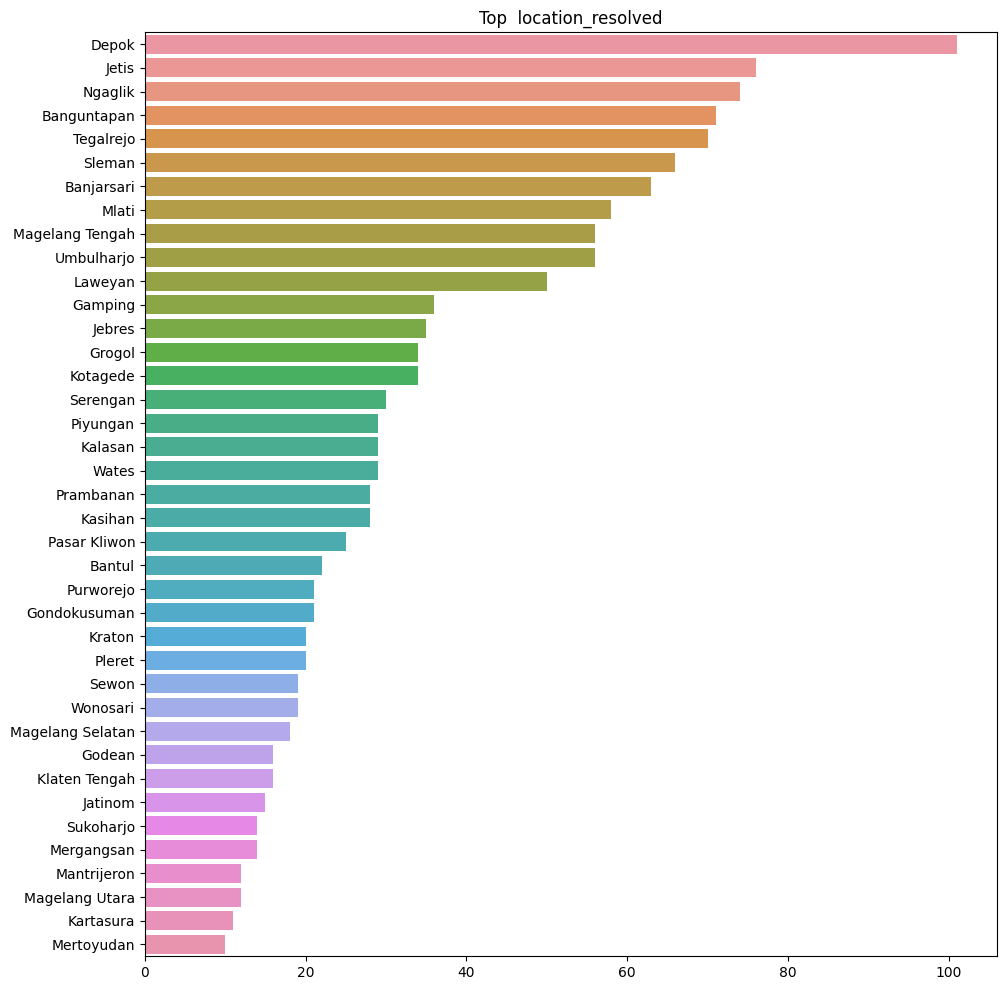

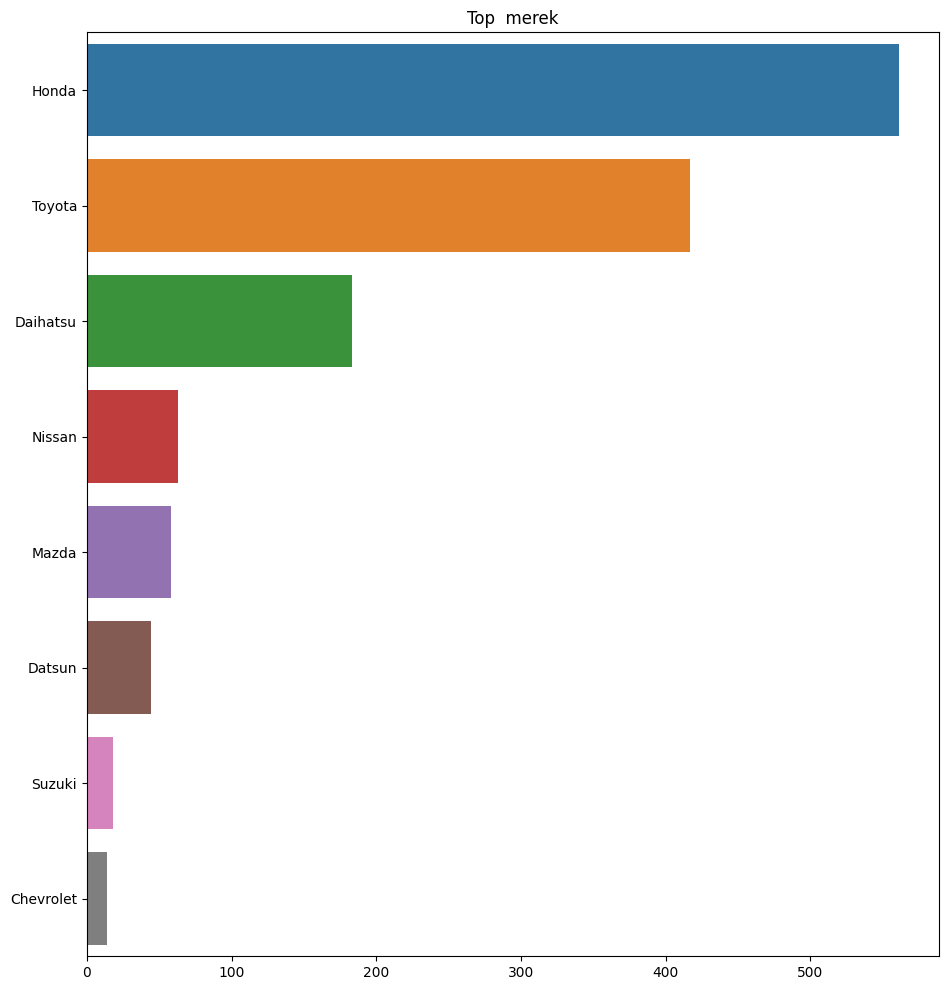

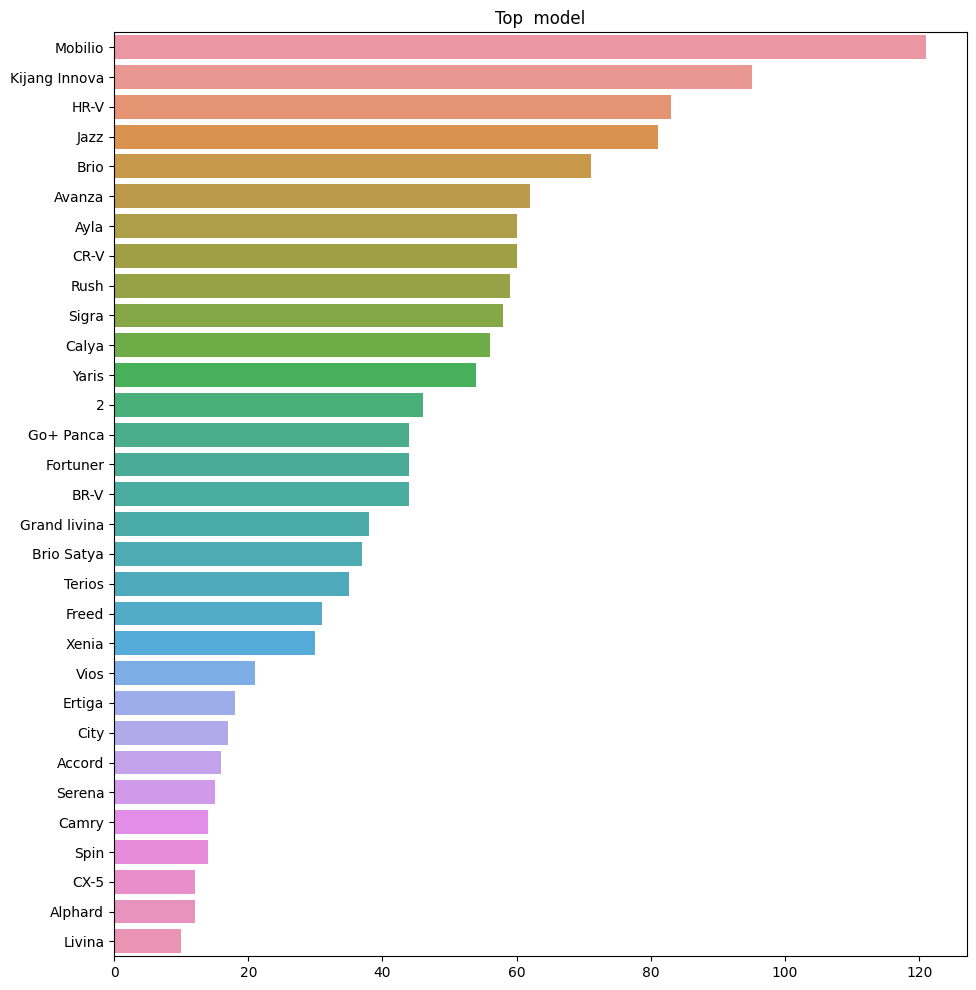

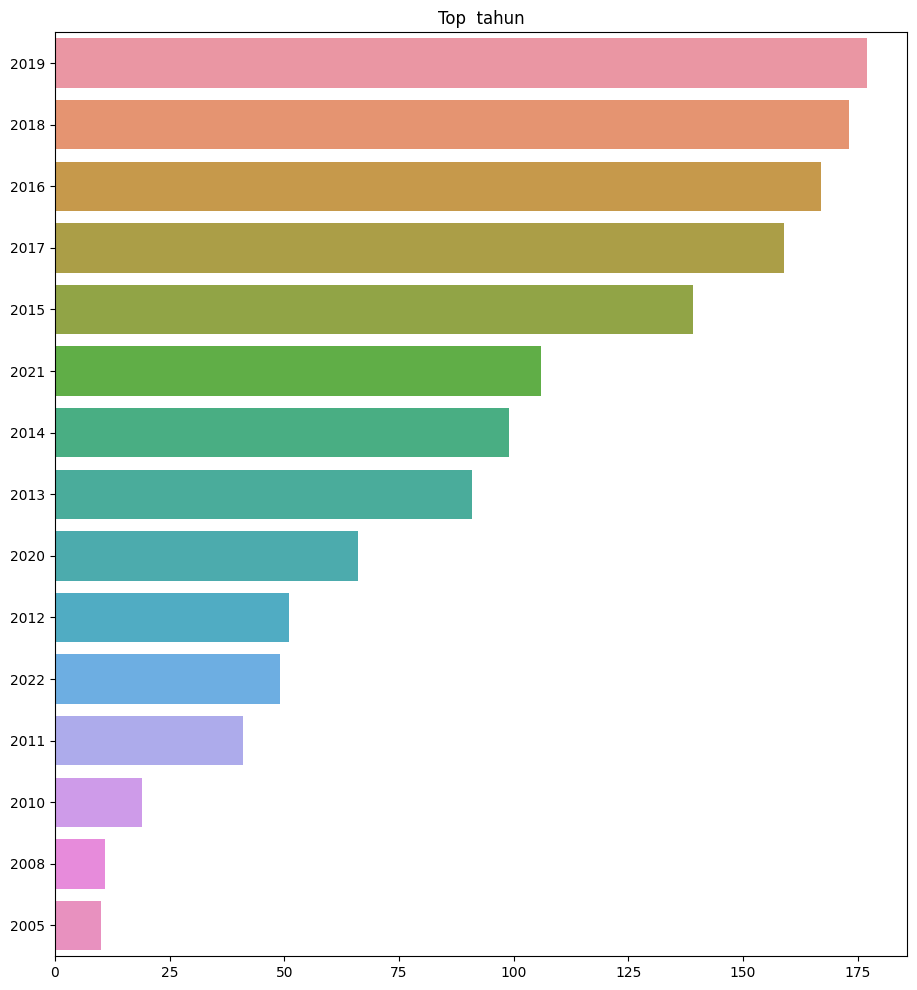

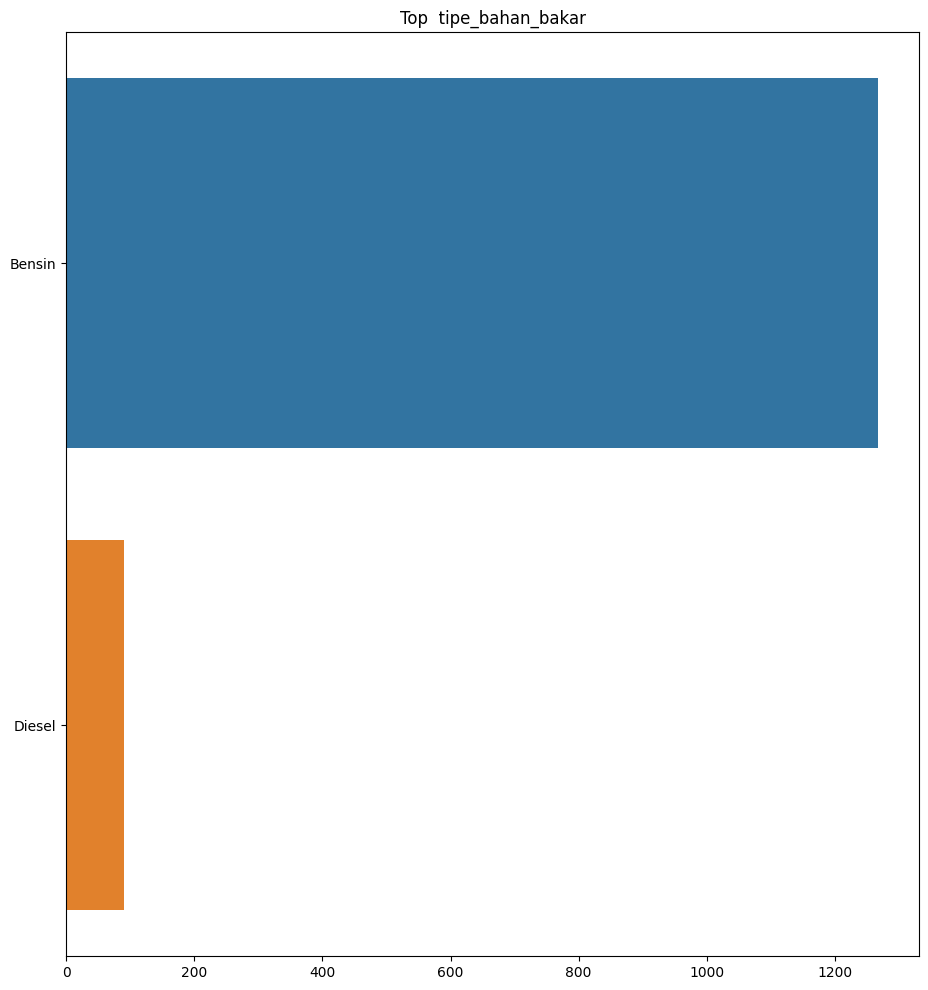

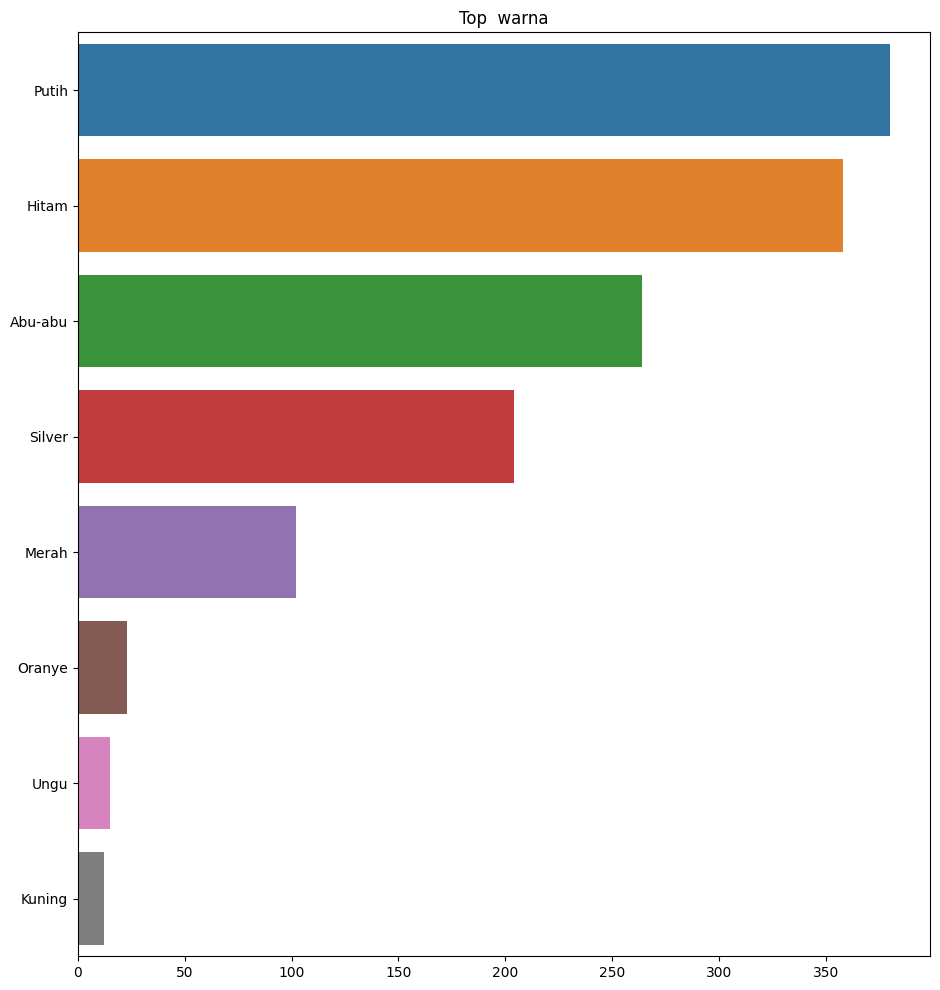

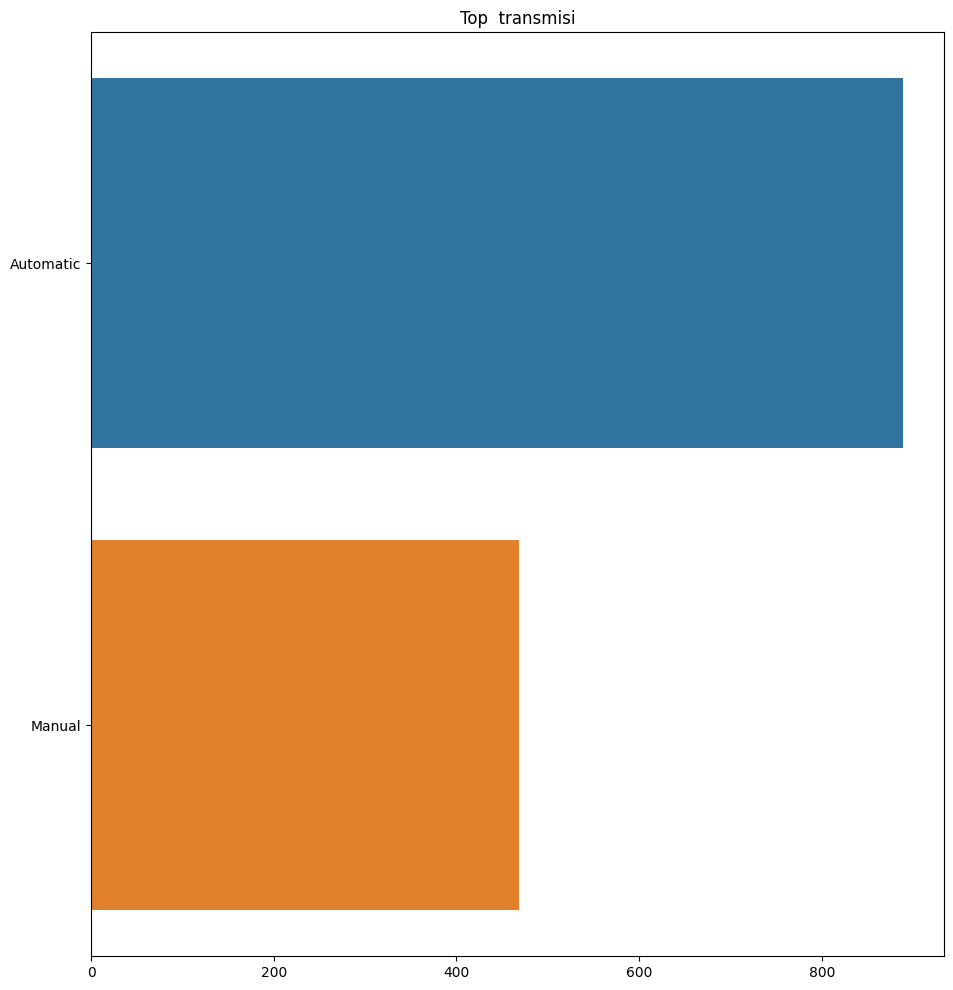

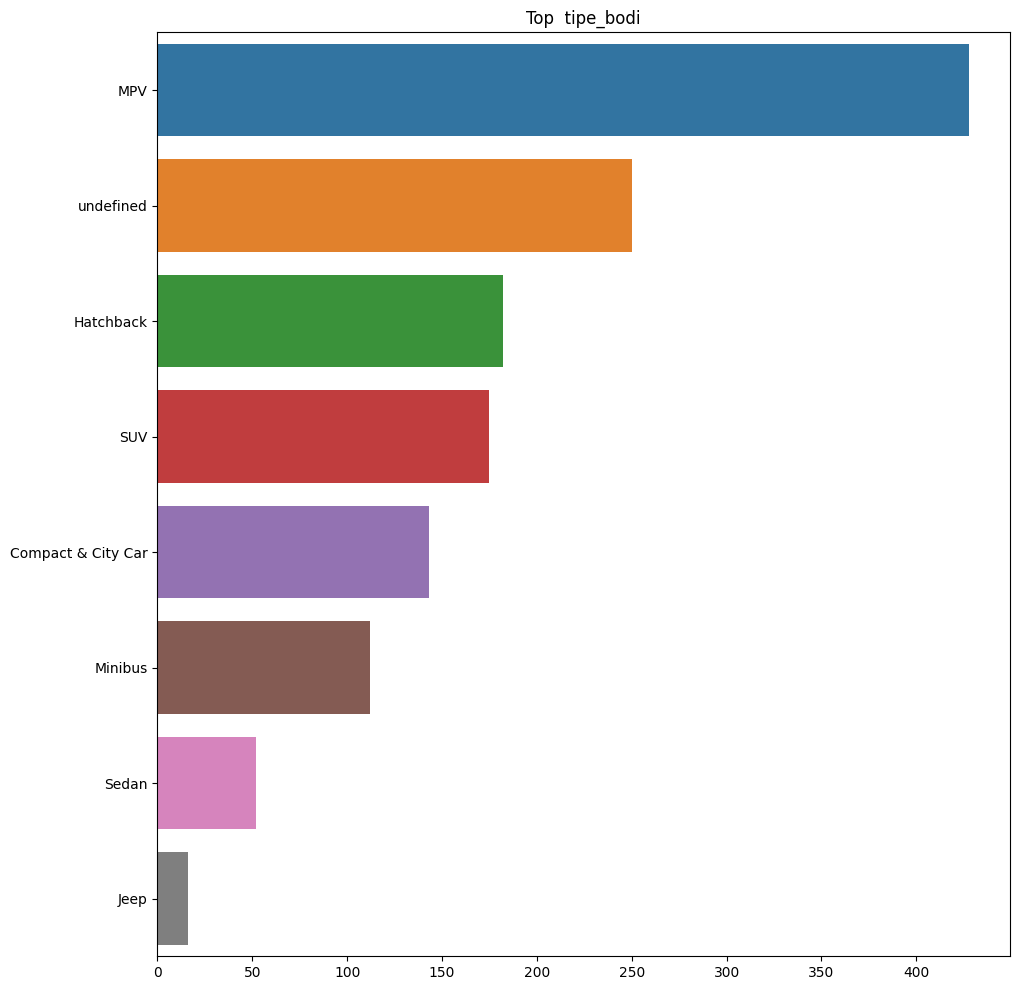

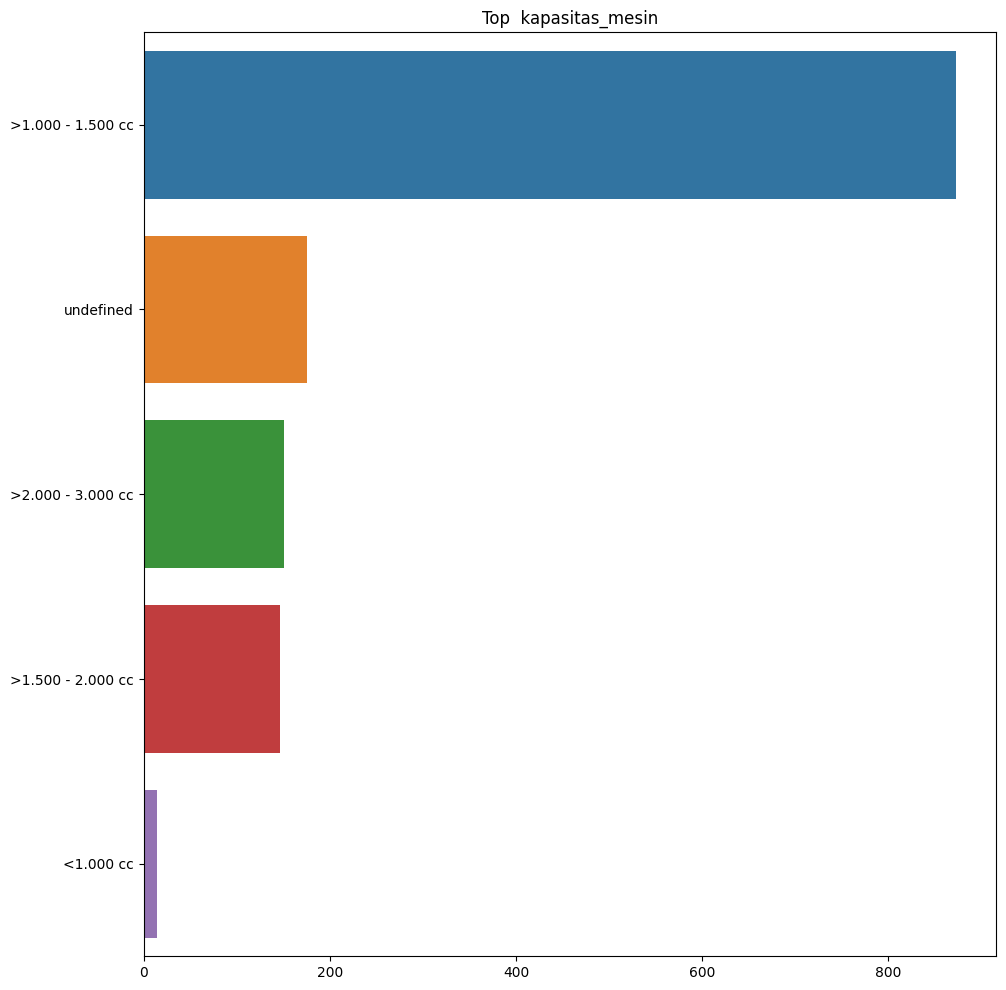

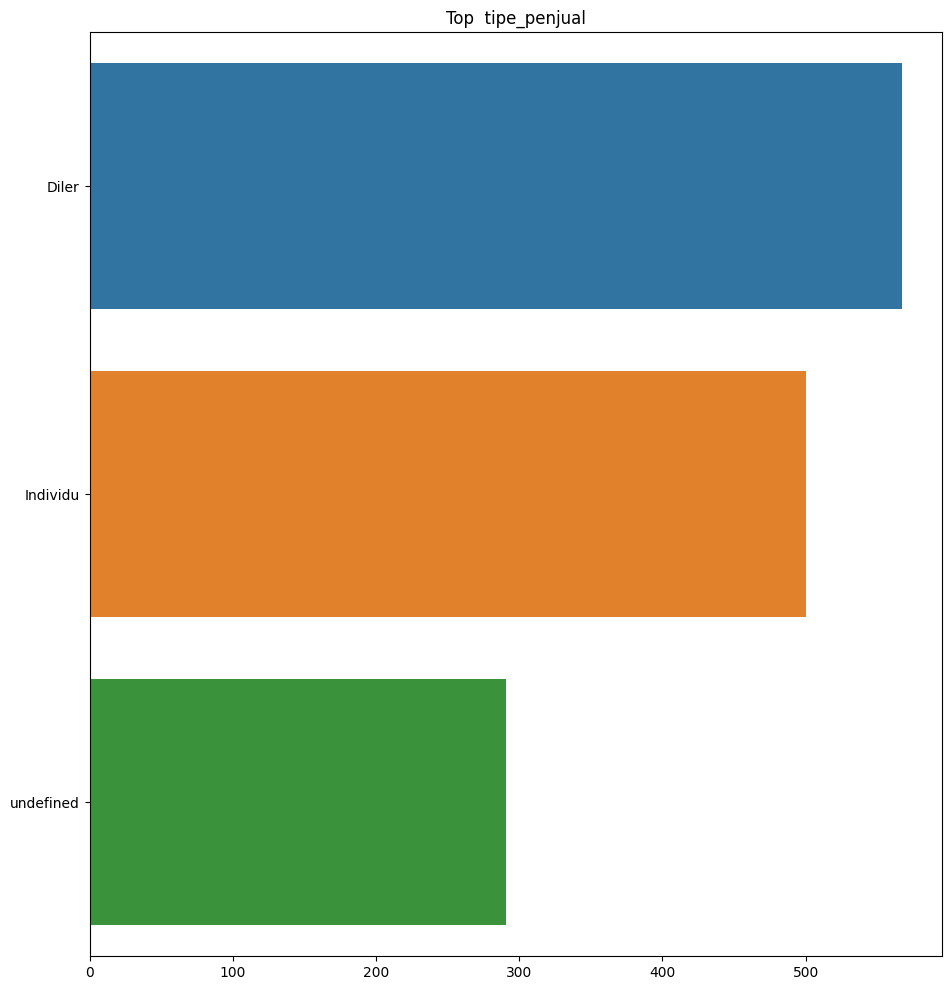

In [67]:
size=(11,12)
for col in colcat:
    cat_dist(df,col)